In [ ]:
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import expon 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import math
import random

# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [ ]:
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.37024416 2.07862221 2.21369026 2.98042694 2.2071363  2.40285168
 2.06615109 2.57453355 2.93625047 2.53867094]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

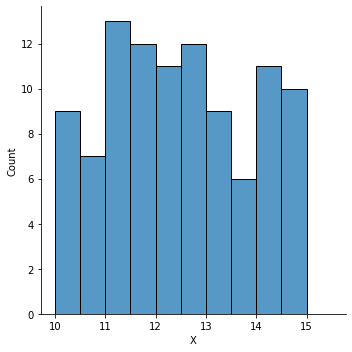

In [ ]:
# your code here
def unif_gen(k,b,a):
  import random
  list_normalised_uni_rnds = [random.random() for i in range(k)]
  return [(a + (b-a)*element) for element in list_normalised_uni_rnds]

count = 100
a, b, bin_size = 10, 15, 10
s = (b-a)/bin_size

x = pd.Series(unif_gen(count,b,a), name="X")
mybins = np.arange(a,b+1,s)
sns.displot(x, bins = mybins)

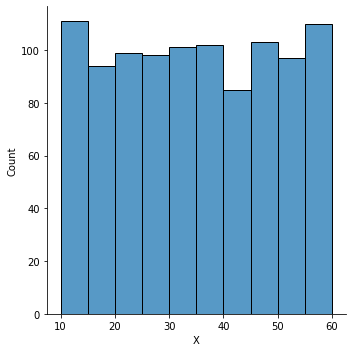

In [ ]:
count = 1000
a, b, bin_size = 10, 60, 10
s = (b-a)/bin_size
mybins = np.arange(a,b+1,s)

x = pd.Series(unif_gen(count,b,a), name="X")
sns.displot(x, bins = mybins)

How are the two distributions different?

In [ ]:
# your answer here:
'''
Naturally that the scale is different...
But most important, the second one, having more observations in the same amount of buckets,
Has more similar count in each bar.
Tending to infinity all bars would be the same size.
'''

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

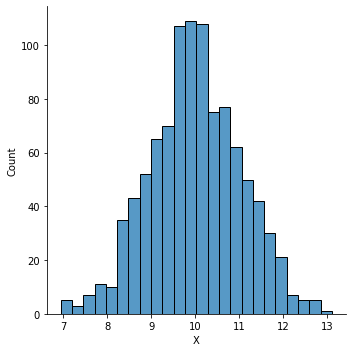

In [ ]:
# your code here
def norm_gen(k,mean,st_dev):
  import numpy as np
  list_normalised_norm_rnds = [np.random.normal() for i in range(k)]
  return [(mean + st_dev*element) for element in list_normalised_norm_rnds]

count = 1000
mean, st_dev = 10, 1

x = pd.Series(norm_gen(count,mean,st_dev), name="X")
sns.displot(x)

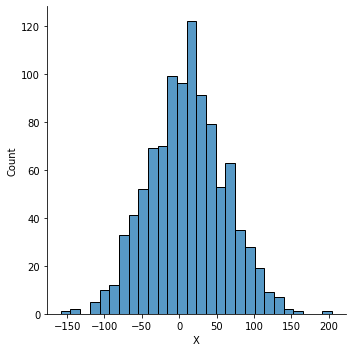

In [ ]:
count = 1000
mean, st_dev = 10, 50

x = pd.Series(norm_gen(count,mean,st_dev), name="X")
sns.displot(x)

How are the two distributions different?

In [ ]:
# your answer here:
'''
The values that x assumes are drastically different because of the std difference.
In the first they are more or less around 7 and 14 ...
In the second ~ -150 and 200 ish.
They are still centered around the same mean of 10.
'''

'\nThe values that x assumes are drastically different because of the std difference.\nIn the first they are more or less around 7 and 14 ...\nIn the second ~ -150 and 200 ish.\nThey are still centered around the same mean of 10.\n'

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

In [114]:
# your code here
DF = pd.read_csv('https://raw.githubusercontent.com/rui-pduarte/lab-probability-distributions/master/your-code/vehicles.csv')

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

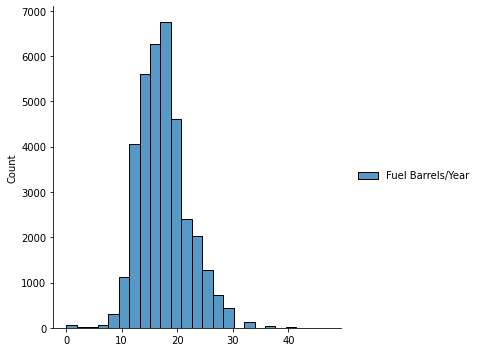

In [ ]:
x = DF[['Fuel Barrels/Year']]

# Treating bins just to get specify just bin_sizes
x_min, x_max = float(x.min()), float(x.max())
a, b, bin_size = x_min, x_max, 25
s = (b-a)/bin_size
mybins = np.arange(a,b+1,s)

sns.displot(x, bins = mybins) # Not specifying the bins gets a less clear plot.

2. CO2 Emission Grams/Mile 

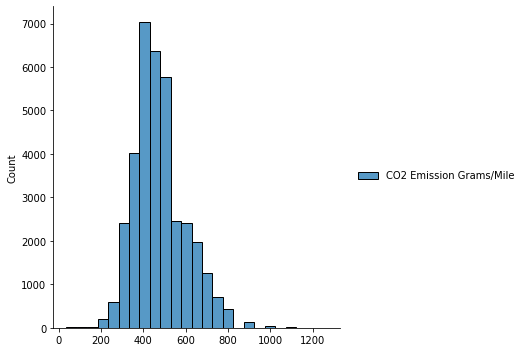

In [ ]:
# your code here
x = DF[['CO2 Emission Grams/Mile']]

# Treating bins just to get specify just bin_sizes
x_min, x_max = float(x.min()), float(x.max())
a, b, bin_size = x_min, x_max, 25
s = (b-a)/bin_size
mybins = np.arange(a,b+1,s)

sns.displot(x, bins = mybins) # Not specifying the bins gets a less clear plot.

3. Combined MPG

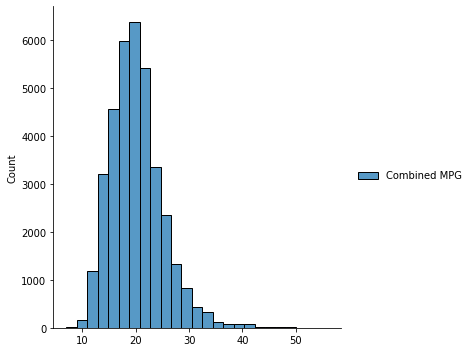

In [ ]:
# your code here
x = DF[['Combined MPG']]

# Treating bins just to get specify just bin_sizes
x_min, x_max = float(x.min()), float(x.max())
a, b, bin_size = x_min, x_max, 25
s = (b-a)/bin_size
mybins = np.arange(a,b+1,s)

sns.displot(x, bins = mybins) # Not specifying the bins gets a less clear plot.

Which one(s) of the variables are nearly normally distributed? How do you know?

In [ ]:
# you answer here:
'''
Honestly, none.
If I had to choose one which is particularly not normal that would be the third one.
It is way too skewed to the left. The other are not normal either...
In addition to this intuition I will: 
 i) compare one of the series with a normal generated data
 ii) do two statistical tests of normality.
'''

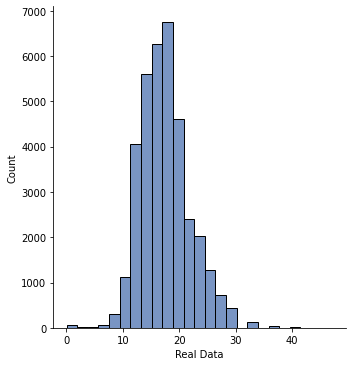

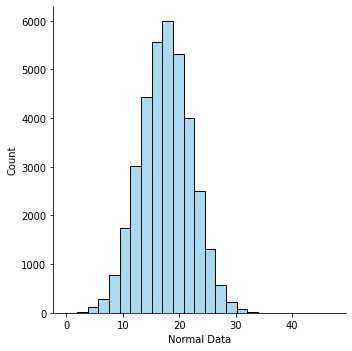

'\nFirst plot a bit skewed to the left and high kurtosis.\n'

In [119]:
X = DF[['Fuel Barrels/Year']]
Y = pd.Series(norm_gen(len(X),DF['Fuel Barrels/Year'].mean(),DF['Fuel Barrels/Year'].std()), name="FBY_Norm_Sample_Gen")

# Treating bins just to get specify just bin_sizes
X_min, X_max = float(X.min()), float(X.max())
a, b, bin_size = X_min, X_max, 25
s = (b-a)/bin_size
mybins = np.arange(a,b+1,s)

fig_1 = sns.displot(X, bins = mybins,color="r",legend=False)
plt.xlabel("Real Data")
plt.ylabel("Count")
plt.show(fig)
fig_2 = sns.displot(Y, bins = mybins,color="skyblue")
plt.xlabel("Normal Data")
plt.ylabel("Count")
plt.show(fig)

'''
First plot a bit skewed to the left and high kurtosis.
'''

In [86]:
def kolmogorov_smirnov_test_print(pandas_df,list_cols,alpha):
  from scipy.stats import kstest
  for i in list_cols:
    normed_data=(pandas_df[i]-pandas_df[i].mean())/pandas_df[i].std()
    stat, p = kstest(normed_data,'norm')
    if p > alpha:	print(str(i) + ' looks normal (fail to reject H0)')
    else:	print(str(i) + ' does not look normal (reject H0)')
    print("Kolmogorov Smirnov's Test for " + str(i) + ' Statistics=%.3f, p=%.3f' % (stat, p))
    print("")

def shapiro_test_print(pandas_df,list_cols,alpha):
  from scipy.stats import shapiro
  for i in list_cols:
    normed_data=(pandas_df[i]-pandas_df[i].mean())/pandas_df[i].std()
    stat, p = shapiro(normed_data)
    if p > alpha:	print(str(i) + ' looks normal (fail to reject H0)')
    else:	print(str(i) + ' does not look normal (reject H0)')
    print("Shapiro Wilk's Test for " + str(i) + ' Statistics=%.3f, p=%.3f' % (stat, p))
    print("")

cols = ['Fuel Barrels/Year','CO2 Emission Grams/Mile','Combined MPG']
kolmogorov_smirnov_test_print(DF,cols,0.05)
shapiro_test_print(DF,cols,0.05)

'''
None appears to be normal.
'''

Fuel Barrels/Year does not look normal (reject H0)
Kolmogorov Smirnov's Test for Fuel Barrels/Year Statistics=0.112, p=0.000

CO2 Emission Grams/Mile does not look normal (reject H0)
Kolmogorov Smirnov's Test for CO2 Emission Grams/Mile Statistics=0.108, p=0.000

Combined MPG does not look normal (reject H0)
Kolmogorov Smirnov's Test for Combined MPG Statistics=0.103, p=0.000

Fuel Barrels/Year does not look normal (reject H0)
Shapiro Wilk's Test for Fuel Barrels/Year Statistics=0.967, p=0.000

CO2 Emission Grams/Mile does not look normal (reject H0)
Shapiro Wilk's Test for CO2 Emission Grams/Mile Statistics=0.968, p=0.000

Combined MPG does not look normal (reject H0)
Shapiro Wilk's Test for Combined MPG Statistics=0.947, p=0.000



/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


'\nNone appears to be normal.\n'

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with a mean of 1 and 100 and a size of 1000.

1. Plot the distributions as histograms with the number of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

1.0128499743435855
99.85899930222803


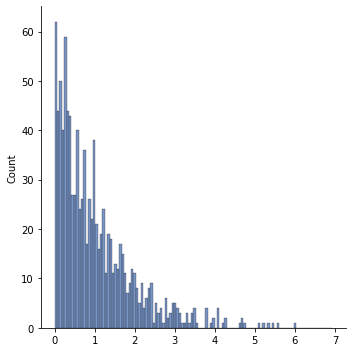

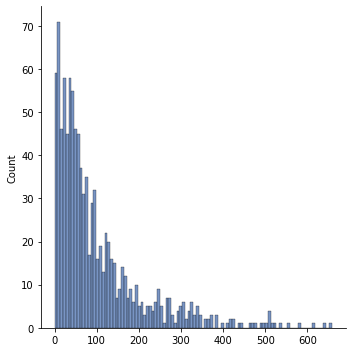

In [108]:
# your code here
# your code here
def exp_gen(k, beta):
  import numpy as np
  return [np.random.exponential(beta) for i in range(k)]

exp_mean_one = exp_gen(1000,1)
exp_mean_hundred = exp_gen(1000,100)

a, b, bin_size = min(exp_mean_one), max(exp_mean_one), 100
s = (b-a)/bin_size
mybins = np.arange(a,b+1,s)

print(sum(exp_mean_one)/len(exp_mean_one))
sns.displot(exp_mean_one, bins = mybins)

a, b, bin_size = min(exp_mean_hundred), max(exp_mean_hundred), 100
s = (b-a)/bin_size
mybins = np.arange(a,b+1,s)

print(sum(exp_mean_hundred)/len(exp_mean_hundred))
sns.displot(exp_mean_hundred, bins = mybins)

How are the two distributions different?

In [ ]:
# your answer here:
'''
The have are scaled differently.
Have diferent means. The mean (beta, also 1/lambda) is the sole characterising moment of the exponential distribution.
So a change in this parameter scales it.
'''

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [112]:
# your answer here
# Hint: This is same as saying P(x<15)

def my_exp_cdf(x,beta_param):
  if x < 0:
    return 0
  else:
    return 1 - math.exp((-1/beta_param)*x)

my_exp_cdf(15,10)

0.7768698398515702

What is the probability that the customer will spend more than 15 minutes

In [113]:
# your answer here
1 - my_exp_cdf(15,10)

0.2231301601484298